Objectif
Dans ce point de contrôle, nous allons prédire si un patient a une maladie rénale chronique ou non en utilisant plusieurs algorithmes de classification de l’apprentissage supervisé. Ensuite, nous identifierons les clusters inhérents à nos données à l’aide d’algorithmes de clustering d’apprentissage non supervisé.

Instructions
Partie 1 : apprentissage supervisé

Chargez l’ensemble de données sur les maladies rénales.
Utilisez cette commande pour renommer les colonnes : data.rename(columns={'bp': 'blood_pressure', 'sg': 'densité ','al':'albumine','su':'sucre','rbc':'globules rouges','pc':'cellule pus','pcc':'amas de cellules de pus','ba':'bactéries','bgr':'glycémie aléatoire','bu':'urée sanguine','sc':'créatinine sérique','sod':'sodium','pot':'potassium','hémo':'hémoglobine','pcv':'volume cellulaire emballé','wc':'numération des globules blancs', 'rc':'nombre de globules rouges','HTN':'hypertension','dm':'diabète sucré','cad':'maladie coronarienne','appet':'appétit','pe':'œdème pédale','ane':'anémie','classification':'classe'},inplace=Vrai)
Appliquez une régression logistique et imprimez la matrice de confusion pour valider votre modèle.
Appliquer KNN et choisir le nombre optimal de voisins
Appliquez l’arbre de décision, tracez-le et calculez la précision.
Appliquez une forêt aléatoire, calculez la nouvelle précision et comparez-la avec le résultat précédent.

Partie 2 : apprentissage non supervisé

Supprimer la variable cible (nommée « classification »)
Utilisez le clustering hiérarchique pour identifier les regroupements inhérents à vos données.
Tracez les clusters.
Tracez le dendrogramme. Utilisez le clustering k-means et sélectionnez le k optimal.
Tracez les clusters.

IMPORTER LES LIBRAIRIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics
from sklearn import metrics
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import sklearn
import io
import requests
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# CHARGER LES DONNEES

In [2]:
data = pd.read_csv('kidney_disease.csv',sep="," )
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#copie du dataset
data1 = data.copy() 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
data1.rename(columns={'bp': 'blood_pressure', 'sg': 'densité ','al':'albumine','su':'sucre','rbc':'globules rouges','pc':'cellule pus','pcc':'amas de cellules de pus','ba':'bactéries','bgr':'glycémie aléatoire','bu':'urée sanguine','sc':'créatinine sérique','sod':'sodium','pot':'potassium','hémo':'hémoglobine','pcv':'volume_cellulaire_emballé','wc':'numération des globules blancs', 'rc':'nombre de globules rouges','HTN':'hypertension','dm':'diabète sucré','cad':'maladie coronarienne','appet':'appétit','pe':'œdème pédale','ane':'anémie','classification':'classe'},inplace=True)

In [5]:
data1.head()

,id,age,blood_pressure,densité,albumine,sucre,globules rouges,cellule pus,amas de cellules de pus,bactéries,...,volume_cellulaire_emballé,numération des globules blancs,nombre de globules rouges,htn,diabète sucré,maladie coronarienne,appétit,œdème pédale,anémie,classe
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data1.shape

(400, 26)

In [7]:
data1.describe()

,id,age,blood_pressure,densité,albumine,sucre,glycémie aléatoire,urée sanguine,créatinine sérique,sodium,potassium,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [62]:
data1.columns

Index(['id', 'age', 'blood_pressure', 'densité ', 'albumine', 'sucre',
       'globules rouges', 'cellule pus', 'amas de cellules de pus',
       'bactéries', 'glycémie aléatoire', 'urée sanguine',
       'créatinine sérique', 'sodium', 'potassium', 'hemo',
       'volume_cellulaire_emballé', 'numération des globules blancs',
       'nombre de globules rouges', 'htn', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédale', 'anémie', 'classe'],
      dtype='object')

In [63]:
#recherche de valeurs manquantes
data1.isnull().sum()

id                                0
age                               0
blood_pressure                    0
densité                           0
albumine                          0
sucre                             0
globules rouges                   0
cellule pus                       0
amas de cellules de pus           0
bactéries                         0
glycémie aléatoire                0
urée sanguine                     0
créatinine sérique                0
sodium                            0
potassium                         0
hemo                              0
volume_cellulaire_emballé         0
numération des globules blancs    0
nombre de globules rouges         0
htn                               0
diabète sucré                     0
maladie coronarienne              0
appétit                           0
œdème pédale                      0
anémie                            0
classe                            0
dtype: int64

In [10]:
#remplacer les valeurs manquantes de la variable age
data1['age'].fillna(data1['age'].median(0),inplace=True)
data1['age']= data1['age'].astype(float).astype(int)

In [11]:
#remplacer les valeurs manquantes de la variable blood_pressure
data1['blood_pressure'].fillna(method='bfill',inplace=True)

In [12]:
#remplacer les valeurs manquantes de la variable albumine
data1['albumine'].fillna(method='ffill',inplace=True)

In [13]:
#remplacer les valeurs manquantes de la variable sucre
data1['sucre'].fillna(method='ffill',inplace=True)

In [14]:
#remplacer les valeurs manquantes de la variable sucre
data1['globules rouges'].fillna(method='ffill',inplace=True)
data1['globules rouges'].fillna(method='bfill',inplace=True)

In [15]:
data1['classe'].fillna(method='ffill',inplace=True)

In [16]:
data1['anémie'].fillna(method='ffill',inplace=True)

In [17]:
data1['œdème pédale'].fillna(method='ffill',inplace=True)

In [18]:
data1['appétit'].fillna(method='ffill',inplace=True)

In [19]:
data1['maladie coronarienne'].fillna(method='ffill',inplace=True)

In [20]:
data1['diabète sucré'].fillna(method='ffill',inplace=True)

In [21]:
data1['htn'].fillna(method='ffill',inplace=True)

In [22]:
data1['nombre de globules rouges'].fillna(method='ffill',inplace=True)

In [23]:
data1['numération des globules blancs'].fillna(method='ffill',inplace=True)

In [24]:
data1['volume_cellulaire_emballé'].fillna(method='ffill',inplace=True)

In [25]:
data1['hemo'].fillna(method='ffill',inplace=True)

In [26]:
data1['potassium'].fillna(method='bfill',inplace=True)

In [27]:
data1['potassium'].fillna(method='ffill',inplace=True)

In [28]:
data1['sodium'].fillna(method='bfill',inplace=True)

In [29]:
data1['sodium'].fillna(method='ffill',inplace=True)

In [30]:
data1['créatinine sérique'].fillna(method='ffill',inplace=True)

In [31]:
data1['urée sanguine'].fillna(method='ffill',inplace=True)

In [32]:
data1['glycémie aléatoire'].fillna(method='ffill',inplace=True)

In [33]:
data1['bactéries'].fillna(method='ffill',inplace=True)

In [34]:
data1['amas de cellules de pus'].fillna(method='ffill',inplace=True)

In [35]:
data1['cellule pus'].fillna(method='ffill',inplace=True)

In [36]:
data1['globules rouges'].fillna(method='ffill',inplace=True)

In [37]:
data1['densité '].fillna(method='bfill',inplace=True)

In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              400 non-null    int64  
 1   age                             400 non-null    int32  
 2   blood_pressure                  400 non-null    float64
 3   densité                         400 non-null    float64
 4   albumine                        400 non-null    float64
 5   sucre                           400 non-null    float64
 6   globules rouges                 400 non-null    object 
 7   cellule pus                     400 non-null    object 
 8   amas de cellules de pus         400 non-null    object 
 9   bactéries                       400 non-null    object 
 10  glycémie aléatoire              400 non-null    float64
 11  urée sanguine                   400 non-null    float64
 12  créatinine sérique              400 

In [39]:
#recherche de valeurs manquantes
data1.isnull().sum()

id                                0
age                               0
blood_pressure                    0
densité                           0
albumine                          0
sucre                             0
globules rouges                   0
cellule pus                       0
amas de cellules de pus           0
bactéries                         0
glycémie aléatoire                0
urée sanguine                     0
créatinine sérique                0
sodium                            0
potassium                         0
hemo                              0
volume_cellulaire_emballé         0
numération des globules blancs    0
nombre de globules rouges         0
htn                               0
diabète sucré                     0
maladie coronarienne              0
appétit                           0
œdème pédale                      0
anémie                            0
classe                            0
dtype: int64

In [40]:
#conversion de la variable globules rouges de type objet en numerique
cleanup_nums = {
    "globules rouges" : {'normal': 0, 'abnormal': 1} 
}
data1.replace(cleanup_nums, inplace= True)

In [41]:
#conversion de la variable cellule pus de type objet en numerique
cleanup_nums = {
    "cellule pus" : {'normal': 0, 'abnormal': 1} 
}
data1.replace(cleanup_nums, inplace= True)

In [42]:
#conversion de la variable amas de cellules de pus de type objet en numerique
cleanup_nums = {
    "amas de cellules de pus" : {'present': 0, 'notpresent': 1} 
}
data1.replace(cleanup_nums, inplace= True)

In [43]:
#conversion de la variable cellule pus de type objet en numerique
cleanup_nums = {
    "classe" : {'ckd': 0, 'notckd': 1,'ckd\t': 2,} 
}
data1.replace(cleanup_nums, inplace= True)

In [44]:
#conversion de la variable anémie de type objet en numerique
cleanup_nums = {
    "anémie" : {'no': 0, 'yes': 1} 
}
data1.replace(cleanup_nums, inplace= True)

In [45]:
#conversion de la variable œdème pédale de type objet en numerique
cleanup_nums = {
    "œdème pédale" : {'no': 0, 'yes': 1} 
}
data1.replace(cleanup_nums, inplace= True)

In [46]:
#conversion de la variable maladie coronarienne de type objet en numerique
cleanup_nums = {
    "maladie coronarienne" : {'no': 0, 'yes': 1, '\tno': 2} 
}
data1.replace(cleanup_nums, inplace= True)

In [47]:
#conversion de la variable appétit de type objet en numerique
cleanup_nums = {
    "appétit" : {'good': 0, 'poor': 1} 
}
data1.replace(cleanup_nums, inplace= True)

In [48]:
#conversion de la variable diabète sucré de type objet en numerique
cleanup_nums = {
    "diabète sucré" : {'no': 0, 'yes': 1,'\tno': 2, '\tyes': 3, ' yes': 4} 
}
data1.replace(cleanup_nums, inplace= True)

In [49]:
#conversion de la variable htn de type objet en numerique
cleanup_nums = {
    "htn" : {'no': 0, 'yes': 1} 
}
data1.replace(cleanup_nums, inplace= True)

In [50]:
#conversion de la variable nombre de globules rouges de type objet en numerique
cleanup_nums = {
    "nombre de globules rouges" : {'\t?': 0} 
}
data1.replace(cleanup_nums, inplace= True)

In [51]:
#conversion de la variable numération des globules blancs de type objet en numerique
cleanup_nums = {
    "numération des globules blancs" : {'\t?': 0, '\t8400': 8400, 't6200': 6200 } 
}
data1.replace(cleanup_nums, inplace= True)

In [52]:
#conversion de la variable volume cellulaire emballé de type objet en numerique
cleanup_nums = {
    "volume_cellulaire_emballé" : {'\t?': 0, '\t43': 43} 
}
data1.replace(cleanup_nums, inplace= True)

In [53]:
#conversion de la variable bactéries de type objet en numerique
cleanup_nums = {
    "bactéries" : {'present': 0, 'notpresent': 1} 
}
data1.replace(cleanup_nums, inplace= True)

In [64]:
data1['numération des globules blancs']= data1['numération des globules blancs'].astype(object).astype(int)
data1['nombre de globules rouges']= data1['nombre de globules rouges'].astype(object).astype(float)
data1['volume_cellulaire_emballé']= data1['volume_cellulaire_emballé'].astype(object).astype(float)

In [65]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              400 non-null    int64  
 1   age                             400 non-null    int32  
 2   blood_pressure                  400 non-null    float64
 3   densité                         400 non-null    float64
 4   albumine                        400 non-null    float64
 5   sucre                           400 non-null    float64
 6   globules rouges                 400 non-null    int64  
 7   cellule pus                     400 non-null    int64  
 8   amas de cellules de pus         400 non-null    int64  
 9   bactéries                       400 non-null    int64  
 10  glycémie aléatoire              400 non-null    float64
 11  urée sanguine                   400 non-null    float64
 12  créatinine sérique              400 

In [66]:
data1.corr()

,id,age,blood_pressure,densité,albumine,sucre,globules rouges,cellule pus,amas de cellules de pus,bactéries,...,volume_cellulaire_emballé,numération des globules blancs,nombre de globules rouges,htn,diabète sucré,maladie coronarienne,appétit,œdème pédale,anémie,classe
id,1.000000,-0.186274,-0.251217,0.611089,-0.521769,-0.262931,-0.415099,-0.387986,0.264142,0.115955,...,0.620194,-0.165204,0.588331,-0.520089,-0.450402,-0.226292,-0.374394,-0.308120,-0.273096,0.805683
age,-0.186274,1.000000,0.166768,-0.202362,0.132306,0.189849,0.112116,0.145138,-0.157401,-0.042427,...,-0.252137,0.125772,-0.206202,0.395073,0.316297,0.206303,0.156581,0.094772,0.052938,-0.201942
blood_pressure,-0.251217,0.166768,1.000000,-0.173693,0.155426,0.204828,0.203777,0.166131,-0.061412,-0.112154,...,-0.301224,0.050982,-0.193504,0.278419,0.208879,0.099241,0.180258,0.077766,0.208749,-0.289052
densité,0.611089,-0.202362,-0.173693,1.000000,-0.453549,-0.266308,-0.352261,-0.327873,0.259846,0.198158,...,0.517924,-0.191179,0.505101,-0.377839,-0.431374,-0.180987,-0.221253,-0.285849,-0.222038,0.694148
albumine,-0.521769,0.132306,0.155426,-0.453549,1.000000,0.279962,0.287716,0.510246,-0.368349,-0.341196,...,-0.519962,0.156753,-0.496938,0.496942,0.376555,0.245551,0.333725,0.411576,0.279515,-0.588503
sucre,-0.262931,0.189849,0.204828,-0.266308,0.279962,1.000000,0.139747,0.143467,-0.143850,-0.102284,...,-0.165322,0.189268,-0.130809,0.300975,0.354901,0.222831,0.097796,0.122413,0.064659,-0.322082
globules rouges,-0.415099,0.112116,0.203777,-0.352261,0.287716,0.139747,1.000000,0.230405,-0.101746,-0.123267,...,-0.334903,-0.003313,-0.320675,0.267191,0.273821,0.138560,0.245554,0.233154,0.151744,-0.474326
cellule pus,-0.387986,0.145138,0.166131,-0.327873,0.510246,0.143467,0.230405,1.000000,-0.475537,-0.313764,...,-0.441264,0.108015,-0.415705,0.316125,0.277420,0.199329,0.300537,0.345222,0.256362,-0.396574
amas de cellules de pus,0.264142,-0.157401,-0.061412,0.259846,-0.368349,-0.143850,-0.101746,-0.475537,1.000000,0.275082,...,0.238149,-0.188005,0.247001,-0.195623,-0.120961,-0.158208,-0.189688,-0.104356,-0.175861,0.232623
bactéries,0.115955,-0.042427,-0.112154,0.198158,-0.341196,-0.102284,-0.123267,-0.313764,0.275082,1.000000,...,0.175186,-0.062402,0.185305,-0.089046,-0.054217,-0.138401,-0.149126,-0.134732,-0.052208,0.186972


# APPRENTISSAGE SUPERVISE

In [67]:
x = data1.drop('classe', axis=1)
y = data1['classe']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [68]:
# creation du modele de regression logistique
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  
print(y_pred)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print(" prediction : {} " .format(accuracy_score(y_test, y_pred)* 100))
print(classification_report(y_test,y_pred))

[0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 0 1 1]
Accuracy=1.00
 prediction : 100.0 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        29

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

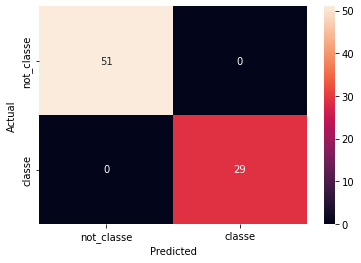

In [69]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, xticklabels=['not_classe', 'classe'], yticklabels=['not_classe', 'classe'])

#La matrice de confusion montre le total des détails des données X_test comme suit: TP = vrais positifs = 51 TN = vrais négatifs = 29 FP = faux positifs = 0 FN = faux négatifs = 0

#La sensibilité nous indique quelle proportion de la classe positive a été correctement classée.

sensibilité// Taux de positivité réelle / Rappel = TP / (TP + FN) = 51/51 = 1

La proportion de personnes réelles qui ont survecues qui a été correctement détectée par le modèle.

#Taux de faux négatifs

Le taux de faux négatifs (FNR) nous indique quelle proportion de la classe positive a été mal classée par le classificateur.

FNR = FN / (TP + FN) = 0/51= 0

Un TPR plus élevé et un FNR plus faible sont souhaitables car nous voulons classer correctement la classe positive.

#Spécificité / Taux négatif réel Formule de spécificité TNR = TN / (TN + FP) = 29/29 = 1 La spécificité nous indique quelle proportion de la classe négative a été correctement classée.

Taux de faux positifs

FPR nous indique quelle proportion de la classe négative a été mal classée par le classificateur.

FPR = 1 - TNR = 1-1 = 0

Un TNR plus élevé et un FPR plus faible sont souhaitables car nous voulons classer correctement la classe négative.

#Ainsi, la précision totale selon la confusion_matrix est: #Précision = (TP + TN) / Total = (51 + 29) / 80 = 1


Maintenant, nous allons contre-vérifier le résultat par impression. Donc, nous imprimons simplement les 5 premiers éléments du X_test et du y_test en utilisant la fonction head pandas.
Ensuite, nous imprimons également les 5 premiers résultats des prédictions comme indiqué ci-dessous:

In [70]:
x_test.head()

,id,age,blood_pressure,densité,albumine,sucre,globules rouges,cellule pus,amas de cellules de pus,bactéries,...,hemo,volume_cellulaire_emballé,numération des globules blancs,nombre de globules rouges,htn,diabète sucré,maladie coronarienne,appétit,œdème pédale,anémie
35,35,65,90.0,1.020,2.0,1.0,1,0,1,1,...,12.0,36.0,9800,4.9,1,1,0,1,0,1
316,316,35,70.0,1.020,0.0,0.0,0,0,1,1,...,15.4,48.0,5000,5.2,0,0,0,0,0,0
281,281,55,80.0,1.025,0.0,0.0,0,0,1,1,...,15.5,41.0,9100,6.0,0,0,0,0,0,0
74,74,56,90.0,1.015,2.0,0.0,1,1,1,1,...,9.1,29.0,6400,3.4,1,0,0,0,0,0
296,296,41,70.0,1.020,0.0,0.0,0,0,1,1,...,16.8,41.0,6300,5.9,0,0,0,0,0,0


In [71]:
y_test.head()

35     0
316    1
281    1
74     0
296    1
Name: classe, dtype: int64

In [72]:
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

# Validation pour la classification est ROC / AUC

Une fois que nous avons créé le modèle. Il est très important d’évaluer la précision du modèle pour comprendre s’il est important de le mettre en œuvre ou non. La courbe ROC est l’une des méthodes d’évaluation importantes. La courbe ROC est une courbe de probabilité qui trace le taux de vrais positifs par rapport au taux de faux positifs.
Ici, le taux de vrais positifs est le nombre de prédictions où le modèle a réussi à prédire correctement le résultat.

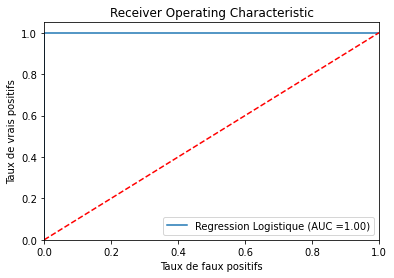

In [73]:
#roc curve and auc
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test) )
fpr , tpr , thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1] )
plt.figure()
plt.plot(fpr, tpr, label='Regression Logistique (AUC =%0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Si le TPR est plus proche de 1, cela montre que c’est un très bon modèle. Le modèle est capable de distinguer correctement les résultats positifs des résultats négatifs. Si le TPR est de 0,5, cela montre que le modèle est aussi bon qu’une supposition. Si le TPR est inférieur à 0,5, cela montre que le modèle prédit des valeurs positives comme négatives et des valeurs négatives comme positives.

ICI L'AUC = 1.00 : Cela montre que c'est un  modèle parfait. car le modèle a ete capable de predire correctement à 100% le resulat.


# Partie 2 KNN

Appliquer KNN et choisir le nombre optimal de voisins

In [74]:
# KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)
print('Accuracy=',accuracy_score(y_pred,y_test))
print(" prediction : {} " .format(accuracy_score(y_test, y_pred)* 100))

Accuracy= 0.8625
 prediction : 86.25 


Choisissez le nombre optimal de voisins

In [75]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.8
Accuracy for k= 2 is: 0.78
Accuracy for k= 3 is: 0.74
Accuracy for k= 4 is: 0.74
Accuracy for k= 5 is: 0.75
Accuracy for k= 6 is: 0.78
Accuracy for k= 7 is: 0.76
Accuracy for k= 8 is: 0.75
Accuracy for k= 9 is: 0.75
Accuracy for k= 10 is: 0.74
Accuracy for k= 11 is: 0.79
Accuracy for k= 12 is: 0.79
Accuracy for k= 13 is: 0.8
Accuracy for k= 14 is: 0.8
Accuracy for k= 15 is: 0.85
Accuracy for k= 16 is: 0.82
Accuracy for k= 17 is: 0.86
Accuracy for k= 18 is: 0.82
Accuracy for k= 19 is: 0.85
Accuracy for k= 20 is: 0.85
Accuracy for k= 21 is: 0.84
Accuracy for k= 22 is: 0.85
Accuracy for k= 23 is: 0.88
Accuracy for k= 24 is: 0.86
Accuracy for k= 25 is: 0.86
Accuracy for k= 26 is: 0.88
Accuracy for k= 27 is: 0.88
Accuracy for k= 28 is: 0.92
Accuracy for k= 29 is: 0.9


Text(0, 0.5, 'Testing Accuracy')

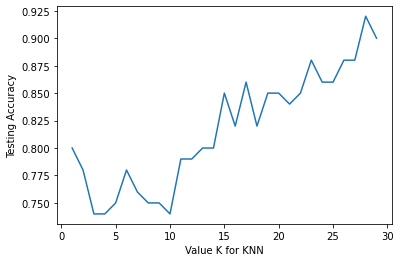

In [76]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

le nombre optimal de voisins est de 17.

# Partie 3 : Arbre de décision

Appliquez l’arbre de décision, tracez-le et calculez la précision.

In [77]:
#ARBRE DE DECISION
tree = DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
print(" prediction : {} " .format(accuracy_score(y_test, y_pred)* 100))

score:0.9875
 prediction : 98.75 


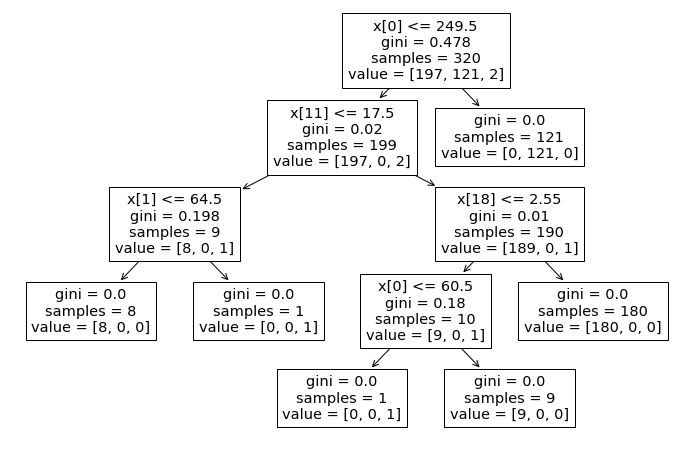

In [78]:
plt.figure(figsize = (12,8))
plot_tree(tree)
plt.show()

# Partie 4 une forêt aléatoire

Appliquez une forêt aléatoire, calculez la nouvelle précision et comparez-la avec le résultat précédent

In [79]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("Score Random Forest : ", metrics.accuracy_score(rf_pred, y_test))
print(" prediction : {} " .format(metrics.accuracy_score(rf_pred, y_test)* 100))

Score Random Forest :  1.0
 prediction : 100.0 


la valeur de la precision de la forêt aléatoire est de 100 meilleure que celle 
de la valeur de la precision de l'arbre de decision qui est de 98.75.

un graphique récapitulatif qui reprend toutes les précisions de chaque modèle (régression logistique, knn ,Arbre de décision et forêt aléatoire) pour décider quel modèle est le plus performant.

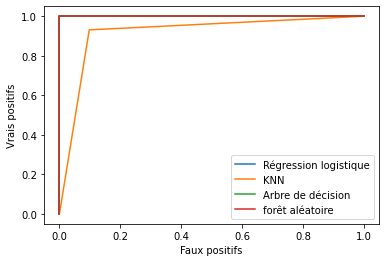

In [80]:
faux_positifs_logreg, vrais_positifs_logreg, seuil_logreg = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.plot(faux_positifs_logreg, vrais_positifs_logreg, label="Régression logistique")
faux_positifs_knn, vrais_positifs_knn, seuil_knn = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.plot(faux_positifs_knn, vrais_positifs_knn, label="KNN")
faux_positifs_tr, vrais_positifs_tr, seuil_tr = roc_curve(y_test, tree.predict_proba(x_test)[:,1])
plt.plot(faux_positifs_tr, vrais_positifs_tr, label="Arbre de décision")
faux_positifs_rf, vrais_positifs_rf, seuil_rf = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(faux_positifs_rf, vrais_positifs_rf, label="forêt aléatoire")
plt.xlabel ("Faux positifs")
plt.ylabel ("Vrais positifs")
plt.legend ()

# APPRENTISSAGE NON SUPERVISE

# Utilisez le clustering hiérarchique pour identifier les regroupements inhérents à vos données

# Clustering Preprocessing

In [81]:
data1=data1.drop("classe",axis=1)
data1=data1.drop("id",axis=1)

In [82]:
#Clustering agglomératif
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data1)  
#Étiquette agglomérative
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
395,1
396,1
397,1
398,1


# Graphique en grappes agglomératives

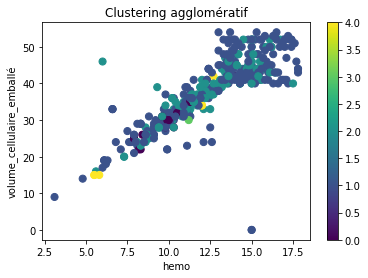

In [84]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data1['hemo'] , data1['volume_cellulaire_emballé'] , c= agglomerative[0], s=50)
ax.set_title("Clustering agglomératif")
ax.set_xlabel("hemo")
ax.set_ylabel("volume_cellulaire_emballé")
plt.colorbar(scatter)

# Visualisation du dendrogramme

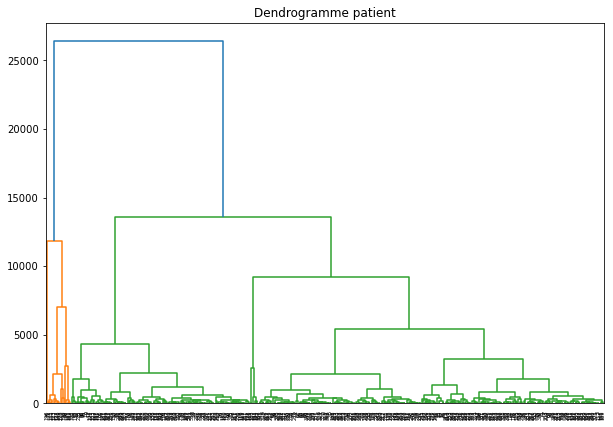

In [85]:
plt.figure(figsize=(10,7))
plt.title("Dendrogramme patient")
dend=shc.dendrogram(shc.linkage(data1, method="complete"))

# Appliquer K-means clustering

In [86]:
data1.columns
kmeans=KMeans(n_clusters=5, random_state=0)  #Regrouper nos données en choisissant 5 comme nombre de clusters
kmeans.fit(data1)

KMeans(n_clusters=5, random_state=0)

# K-means Étiquettes

In [87]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,3
2,1
3,1
4,1
...,...
395,1
396,1
397,1
398,1


# K-Means Centroïdes

In [88]:
kmeans.predict(data1)
print(kmeans.cluster_centers_) 

[[5.23714286e+01 7.60000000e+01 1.01271429e+00 2.14285714e+00
  9.14285714e-01 4.28571429e-01 4.28571429e-01 7.14285714e-01
  8.57142857e-01 1.86285714e+02 8.29142857e+01 5.42857143e+00
  1.33857143e+02 4.21714286e+00 1.05142857e+01 3.20000000e+01
  1.34114286e+04 3.79714286e+00 6.00000000e-01 6.28571429e-01
  8.57142857e-02 4.57142857e-01 4.00000000e-01 3.14285714e-01]
 [5.06453901e+01 7.51773050e+01 1.01843972e+00 8.51063830e-01
  3.33333333e-01 2.19858156e-01 1.56028369e-01 9.43262411e-01
  9.64539007e-01 1.41801418e+02 5.47163121e+01 3.33475177e+00
  1.36648936e+02 4.67446809e+00 1.27574468e+01 3.90709220e+01
  7.29219858e+03 4.67304965e+00 3.33333333e-01 3.19148936e-01
  5.67375887e-02 1.13475177e-01 1.34751773e-01 1.41843972e-01]
 [5.34964029e+01 7.77697842e+01 1.01669065e+00 9.78417266e-01
  6.40287770e-01 2.87769784e-01 2.30215827e-01 8.92086331e-01
  9.49640288e-01 1.53848921e+02 5.20978417e+01 2.39892086e+00
  1.37992806e+02 4.37266187e+00 1.25323741e+01 3.83597122e+01
  9.82

# Tracé K-means

No handles with labels found to put in legend.


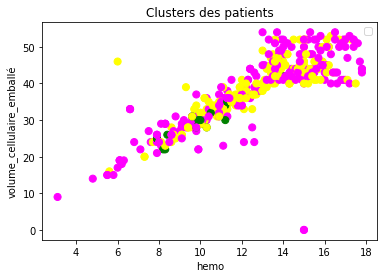

In [104]:
#Visualisation
colormap=np.array(["magenta", "yellow", "green","cyan","burlywood"])
plt.scatter(data1.hemo, data1.volume_cellulaire_emballé, c=colormap[kmeans.labels_], s=50, )
plt.title("Clusters des patients")
plt.xlabel("hemo")
plt.ylabel("volume_cellulaire_emballé")
plt.legend()
plt.show()

In [90]:
sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data1)
    sum_of_squared_distances.append(km.inertia_)

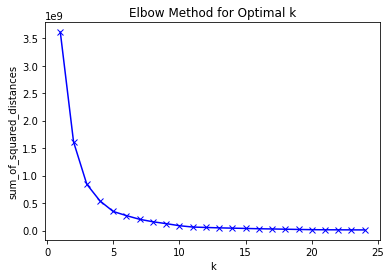

In [91]:
plt.plot(K,sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal K=3.

In [92]:
#Clustering agglomératif
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data1)  
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
395,1
396,1
397,1
398,1


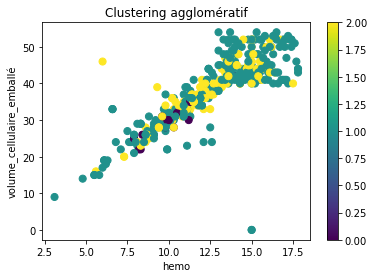

In [93]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data1['hemo'] , data1['volume_cellulaire_emballé'] , c= agglomerative[0], s=50)
ax.set_title("Clustering agglomératif")
ax.set_xlabel("hemo")
ax.set_ylabel("volume_cellulaire_emballé")
plt.colorbar(scatter)

# Tracé K-means apres modification de k

In [98]:
data1.columns
kmeans=KMeans(n_clusters=3, random_state=0)  #Regrouper nos données en choisissant 3 comme nombre de clusters
kmeans.fit(data1)

KMeans(n_clusters=3, random_state=0)

# K-means Étiquettes

In [99]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,0
398,0


# K-Means Centroïdes

In [100]:
kmeans.predict(data1)
print(kmeans.cluster_centers_) 

[[4.96763285e+01 7.54106280e+01 1.01816425e+00 9.46859903e-01
  2.31884058e-01 2.56038647e-01 1.98067633e-01 9.27536232e-01
  9.56521739e-01 1.42014493e+02 5.66309179e+01 3.15748792e+00
  1.36340580e+02 4.78019324e+00 1.24647343e+01 3.77149758e+01
  6.27874396e+03 4.48260870e+00 3.28502415e-01 3.14009662e-01
  7.72946860e-02 1.59420290e-01 1.59420290e-01 1.54589372e-01]
 [5.35344828e+01 7.76436782e+01 1.01640805e+00 1.06896552e+00
  6.55172414e-01 2.93103448e-01 2.18390805e-01 8.79310345e-01
  9.42528736e-01 1.56494253e+02 5.48310345e+01 2.44798851e+00
  1.37436782e+02 4.34827586e+00 1.24241379e+01 3.80977011e+01
  1.00419540e+04 4.53333333e+00 3.85057471e-01 4.31034483e-01
  1.26436782e-01 2.24137931e-01 1.95402299e-01 1.32183908e-01]
 [5.40526316e+01 7.47368421e+01 1.01342105e+00 2.15789474e+00
  9.47368421e-01 2.63157895e-01 6.31578947e-01 6.84210526e-01
  8.42105263e-01 1.71421053e+02 8.33684211e+01 7.05263158e+00
  1.34789474e+02 4.28947368e+00 1.00473684e+01 2.98947368e+01
  1.68

No handles with labels found to put in legend.


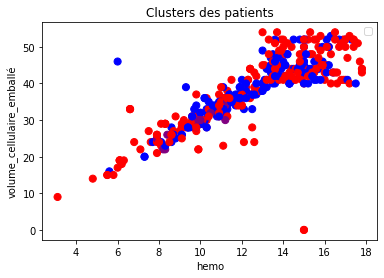

In [103]:
#Visualisation
colormap=np.array(["red", "blue", "purple"])
plt.scatter(data1.hemo, data1.volume_cellulaire_emballé, c=colormap[kmeans.labels_], s=50, )
plt.title("Clusters des patients")
plt.xlabel("hemo")
plt.ylabel("volume_cellulaire_emballé")
plt.legend()
plt.show()